In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./data/dl-pfe-ns.csv')

In [3]:
# df.columns

In [4]:
# df.head()

In [5]:
df.shape

(1976, 81)

In [6]:
# df.info()

In [7]:
X = df.drop('throughput',axis=1)

In [8]:
X.shape

(1976, 80)

In [9]:
y = df['throughput']

In [10]:
y.shape

(1976,)

In [11]:
# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Instantiate model
from sklearn.linear_model import PoissonRegressor
model = PoissonRegressor()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)

In [12]:
model

PoissonRegressor()

In [13]:
mae

3.219938557506138

In [14]:
mse

17.410466874759017

In [15]:
rmse

4.172585154884082

In [16]:
err_df = pd.DataFrame(data=[mae, mse, rmse],index=['MAE','MSE','RMSE'],columns=['PR'])
err_df

,PR
MAE,3.219939
MSE,17.410467
RMSE,4.172585


In [17]:
err_df.to_csv('./test-err/poi-test-err.csv')

In [18]:
y_pred_df = pd.DataFrame(y_pred, columns=['throughput_pred'])
y_pred_df.describe().drop('count')
# no negative predictions

,throughput_pred
mean,13.619916
std,5.765619
min,2.963138
25%,9.156726
50%,12.359343
75%,17.291076
max,30.948582


<AxesSubplot:ylabel='Count'>

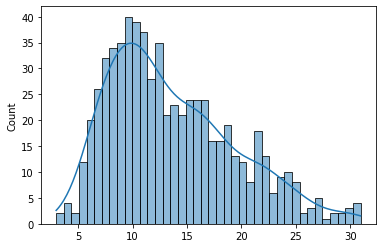

In [19]:
sns.histplot(y_pred,bins=40,kde=True)
# the distribution better reflects the true distribution of the data set

In [20]:
# y.describe().drop(['count'])

In [21]:
res = y_test - y_pred
res.describe().drop('count')

mean    -0.189656
std      4.171468
min    -14.003926
25%     -2.855849
50%     -0.375920
75%      2.211253
max     15.349505
Name: throughput, dtype: float64

<AxesSubplot:xlabel='throughput', ylabel='Count'>

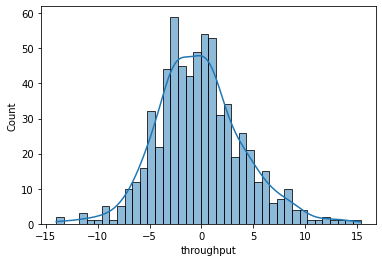

In [22]:
sns.histplot(data=res, kde=True,bins=40)

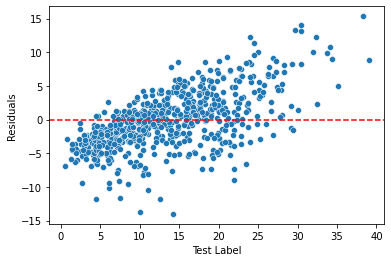

In [23]:
ax = sns.scatterplot(x=y_test, y=res)
ax.set(ylabel='Residuals', xlabel='Test Label')
plt.axhline(y=0,color='red',linestyle='--')

# there should be no clear pattern / curve in the plot
# we see a positive correlation between Test Label and Residuals -> later models should avoid this pattern

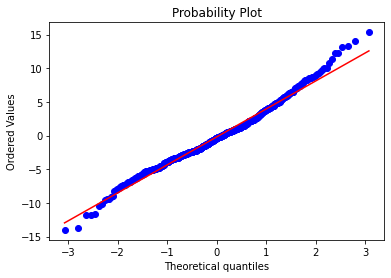

In [24]:
import scipy as sp

fig, ax = plt.subplots()
sp.stats.probplot(res,plot=ax);

In [25]:
# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)

X_poisson = scaler.transform(X)

poisson_model = PoissonRegressor()
poisson_model.fit(X_poisson,y)

PoissonRegressor()

In [26]:
model.coef_

array([ 3.16628424e-03,  9.20442930e-03, -1.13207884e-03, -2.91354568e-02,
        2.48662227e-02,  1.22899554e-02, -1.06807221e-02,  7.74426212e-02,
        4.99474779e-02,  2.34522322e-02, -8.49003122e-04, -5.10024088e-02,
        3.30571216e-01, -9.22298933e-02, -8.42232685e-04, -1.65607774e-02,
       -1.16577116e-02, -5.41133780e-03,  5.67461627e-03, -8.84016048e-03,
        4.96598698e-05,  1.25879186e-02,  9.52511164e-03,  1.39634211e-02,
       -3.97062671e-03, -4.17979266e-03,  3.27825252e-03,  3.22138858e-03,
        9.37474988e-03, -1.54114816e-02,  3.38448382e-03,  5.05719076e-03,
       -1.73710522e-02,  2.83743008e-02,  2.15789556e-02, -3.28088392e-02,
       -3.08192133e-02, -2.69369767e-02,  2.22376604e-02, -1.31197105e-03,
        1.01131849e-02, -1.23529637e-02, -2.25809405e-02,  1.23323998e-02,
       -1.74396267e-02, -5.63355005e-03, -6.55293287e-03, -1.91546389e-02,
       -2.52449644e-02, -1.14591203e-02, -3.14130561e-02,  1.56662148e-02,
        7.01313591e-03,  

In [27]:
# coef_df = pd.DataFrame(data=model.coef_,index=X.columns,columns=['beta'])
# coef_df

In [28]:
poisson_model.coef_

array([-8.07928139e-03,  1.14083139e-02,  4.68753378e-04, -1.86010750e-02,
        2.64736365e-02,  6.99466923e-03, -1.27685126e-02,  8.22273698e-02,
        5.77129843e-02,  2.51567858e-02,  2.57947432e-03, -4.33916878e-02,
        3.38817577e-01, -8.82866017e-02,  8.13849093e-04, -1.42180553e-02,
       -1.57035500e-02, -3.61647612e-03,  5.07681755e-03, -6.74811072e-03,
        5.95833615e-03,  1.83871525e-02,  9.93783845e-03,  1.40854722e-02,
       -3.44016618e-03,  1.67088581e-04,  3.43314609e-03,  1.17501851e-02,
        7.66429631e-03, -1.41349774e-02,  2.08428505e-03,  4.60044036e-03,
       -1.36943694e-02,  3.16467901e-02,  1.63171769e-02, -3.67943723e-02,
       -3.73489916e-02, -3.00429758e-02,  1.91829066e-02,  6.23950607e-03,
        6.80687136e-03, -1.28634056e-02, -1.88043504e-02,  8.86047478e-03,
       -7.48350290e-03, -7.41240859e-03,  2.90056218e-03, -2.91437551e-02,
       -2.05096678e-02, -7.66853101e-03, -2.31930939e-02,  1.59947879e-02,
        6.59438050e-03,  

In [29]:
# coef_df = pd.DataFrame(data=poisson_model.coef_,index=X.columns,columns=['beta'])
# coef_df

In [30]:
delta_df = pd.DataFrame(data=poisson_model.coef_ - model.coef_,index=X.columns,columns=['delta_beta'])
delta_df

,delta_beta
distance,-0.011246
lat,0.002204
lon,0.001601
alt,0.010534
speed,0.001607
...,...
region_urban,-0.002326
weekday_Monday,-0.002367
weekday_Thursday,-0.000138
weekday_Tuesday,-0.004836


In [31]:
pd.set_option('display.max_columns',None)
delta_df.sort_values('delta_beta').sort_values('delta_beta').transpose()

,ci_33527561,distance,ci_28368386,ci_29568768,ci_27771905,ci_29568769,acc,ci_27771140,ci_29913346,ci_29563904,weekday_Tuesday,ci_29401601,ci_26378498,ci_27771904,ci_31281409,ci_29913344,ci_28365058,ci_33527552,ci_27771909,ci_27771906,ci_27771907,region_highway,weekday_Monday,region_urban,ci_33519104,dir,ci_28367106,ci_27299331,ci_27770883,ci_26378755,ci_28365056,ci_27770885,ci_29391104,ci_29398276,weekday_Thursday,ci_29391106,ci_26796290,ci_27256324,ci_28371202,ci_26385410,ci_26796291,ci_27299332,ci_31263232,lon,speed,hour,sinr,ci_26378754,ci_26379013,ci_33837570,lat,ci_26378497,ci_30422273,ci_33527554,ci_30492930,ci_27771139,ci_29913345,cqi,ci_27770888,ci_28365057,ci_28371200,rtt,ci_27029251,weekday_Wednesday,ci_28368651,rsrp,ci_33527559,ci_26385409,ci_26385408,ci_29391105,ci_27771908,ta,rsrq,ci_28371201,payload,ci_27256325,ci_28368384,ci_28367105,alt,region_suburban
delta_beta,-0.015833,-0.011246,-0.009989,-0.008558,-0.00653,-0.005418,-0.005295,-0.005262,-0.00514,-0.004914,-0.004836,-0.004458,-0.004046,-0.003986,-0.0035,-0.003476,-0.003472,-0.003371,-0.003306,-0.003106,-0.003055,-0.002925,-0.002367,-0.002326,-0.002316,-0.002088,-0.001779,-0.00171,-0.0013,-0.000598,-0.00051,-0.000457,-0.000419,-0.000255,-0.000138,-0.000018,0.000122,0.000155,0.000329,0.000413,0.00053,0.001277,0.001294,0.001601,0.001607,0.001656,0.001705,0.001795,0.002092,0.002148,0.002204,0.002343,0.002485,0.002519,0.002577,0.003272,0.003405,0.003428,0.003677,0.003777,0.003791,0.003943,0.004347,0.004372,0.004735,0.004785,0.005258,0.005799,0.005909,0.006399,0.007551,0.007611,0.007766,0.00822,0.008246,0.008529,0.009453,0.009956,0.010534,0.010671


<AxesSubplot:ylabel='Count'>

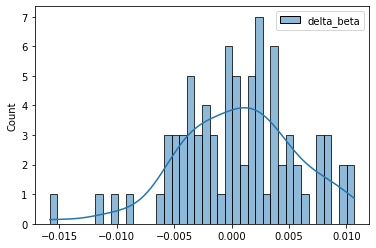

In [32]:
sns.histplot(data=delta_df,bins=40,kde=True)

In [33]:
y_pred_poisson = poisson_model.predict(X_poisson)

<AxesSubplot:ylabel='Count'>

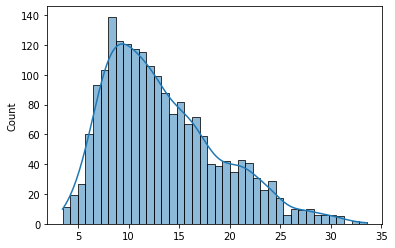

In [34]:
sns.histplot(y_pred_poisson,bins=40,kde=True)

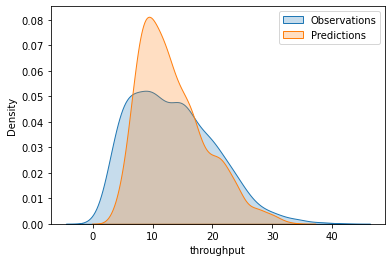

In [35]:
fig,ax = plt.subplots()

sns.kdeplot(y, ax=ax, shade=True, label='Observations')
sns.kdeplot(y_pred_poisson, ax=ax,shade=True,label='Predictions')

ax.legend(loc='best')

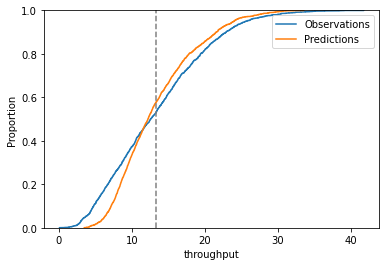

In [36]:
fig,ax = plt.subplots()

sns.ecdfplot(y, ax=ax, label='Observations')
sns.ecdfplot(y_pred_poisson, ax=ax,label='Predictions')
plt.axvline(x=y.mean(),color='grey',linestyle='--')

ax.legend(loc='best')

In [37]:
mae = mean_absolute_error(y,y_pred_poisson)
mse = mean_squared_error(y,y_pred_poisson)
rmse = np.sqrt(mse)

In [38]:
err_df = pd.DataFrame(data=[mae, mse, rmse],index=['MAE','MSE','RMSE'],columns=['PR'])
err_df

,PR
MAE,3.072909
MSE,15.779219
RMSE,3.972306


In [39]:
# err_df.to_csv('./model-err/poi-model-err.csv')

In [40]:
from joblib import dump, load
dump(poisson_model, './models/poi-model.joblib')

['./models/poi-model.joblib']

DONE!